### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler

In [70]:
df=pd.read_pickle(r'D:\Sonal\career foundry\CareerFoundry\Data Immersion\Achievement 6\Exc 6.4\New folder\df_supervised_ML.pkl')

In [71]:
df.shape

(1795, 10)

In [72]:
df.head()

,Company,bean_origin,REF,review_date,cacao_percent,company_location,Rating,bean_type,broad_bean_origin,chocolate category
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,nan,Sao Tome,Mild chocolate
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,nan,Togo,Dark chocolate
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,nan,Togo,Dark chocolate
3,A. Morin,Akata,1680,2015,70.0,France,3.50,nan,Togo,Dark chocolate
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,nan,Peru,Dark chocolate


In [73]:
df.columns

Index(['Company', 'bean_origin', 'REF', 'review_date', 'cacao_percent',
       'company_location', 'Rating', 'bean_type', 'broad_bean_origin',
       'chocolate category'],
      dtype='object')

In [74]:
df_numerical=df[['REF','review_date','cacao_percent','Rating']]

In [75]:
df_numerical

,REF,review_date,cacao_percent,Rating
0,1876,2016,63.0,3.75
1,1676,2015,70.0,2.75
2,1676,2015,70.0,3.00
3,1680,2015,70.0,3.50
4,1704,2015,70.0,3.50
...,...,...,...,...
1790,647,2011,70.0,3.75
1791,749,2011,65.0,3.00
1792,749,2011,65.0,3.50
1793,781,2011,62.0,3.25


### 2. The elbow technique

In [77]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [78]:
score = [kmeans[i].fit(df_numerical).score(df_numerical) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\nmsp1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nmsp1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nmsp1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nmsp1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nmsp1\anaconda3\Lib\site-packages\sklearn\clust

[-548483408.1087043,
 -140233873.01038843,
 -63092214.0720869,
 -35061608.57808439,
 -22374039.78436864,
 -15751280.382544957,
 -11443152.896695731,
 -8806398.373968903,
 -7030034.096041089]

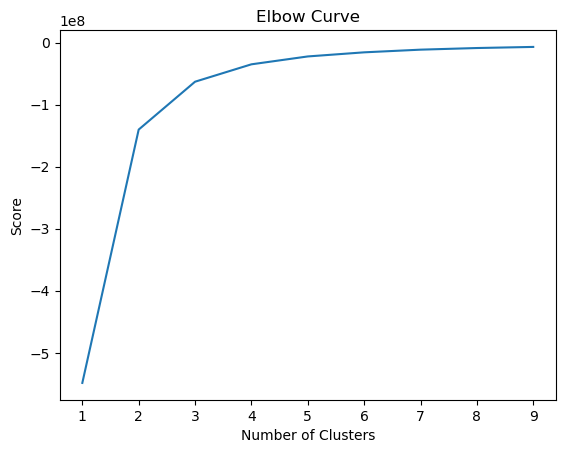

In [79]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there's a large jump from two to three on the x-axis, but after that, Elbow curve somehow stablises on 4, so i think best would be 4

### 3. k-means clustering

In [82]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [83]:
# Fit the k-means object to the data.

kmeans.fit(df_numerical)

C:\Users\nmsp1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [84]:
df_numerical['clusters'] = kmeans.fit_predict(df_numerical)

C:\Users\nmsp1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nmsp1\AppData\Local\Temp\ipykernel_9472\910504188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerical['clusters'] = kmeans.fit_predict(df_numerical)


In [85]:
df_numerical.head()

,REF,review_date,cacao_percent,Rating,clusters
0,1876,2016,63.0,3.75,3
1,1676,2015,70.0,2.75,3
2,1676,2015,70.0,3.00,3
3,1680,2015,70.0,3.50,3
4,1704,2015,70.0,3.50,3


In [86]:
df_numerical['clusters'].value_counts()

clusters
1    487
2    450
3    448
0    410
Name: count, dtype: int64

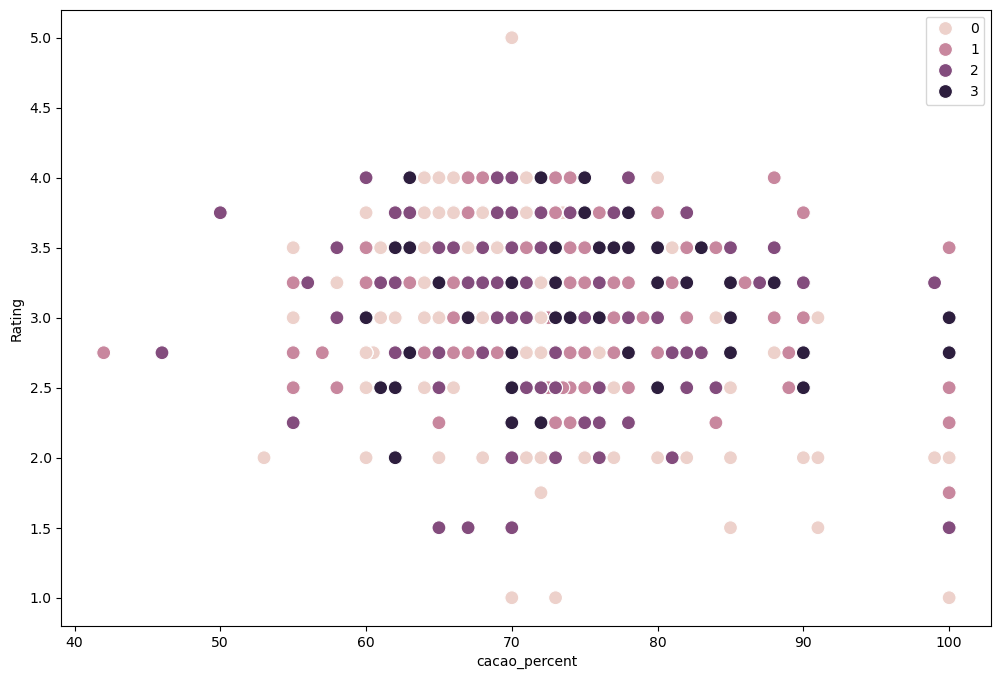

In [87]:
# Plot the clusters for the "Rating and "cacao_percent" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numerical['cacao_percent'], y=df_numerical['Rating'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('cacao_percent') # Label x-axis.
plt.ylabel('Rating') # Label y-axis.
plt.show()

#### The scatterplot shows the results of k-means clustering based on the chocolate "Rating" and "cacao_percent." The four clusters, represented by different colors, reveal the following:

Cluster 0 (light pink): Concentrates on chocolates with moderate cacao percentages (55%-75%) and average ratings (~3.0-4.0).

Cluster 1 (pink): Scattered but mainly covers similar cacao percentages, with lower ratings (~2.5-3.5).

Cluster 2 (purple): Tends to include higher cacao percentages and slightly higher ratings, though not strongly concentrated.

Cluster 3 (dark purple): Focuses on extremes, with some high- and low-cacao chocolates, showing both low and high ratings.

The clusters indicate groupings of chocolate based on their cacao content and ratings, with overlap in the middle ranges.

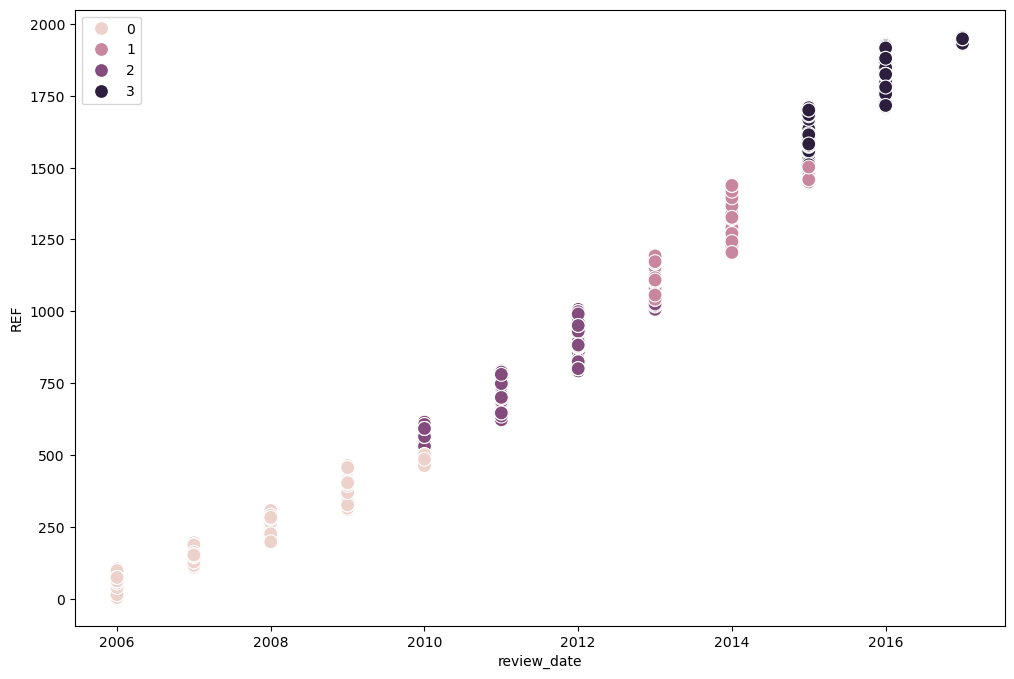

In [89]:
# Plot the clusters for the "REF and "review_date" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numerical['review_date'], y=df_numerical['REF'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('review_date') # Label x-axis.
plt.ylabel('REF') # Label y-axis.
plt.show()

#### The scatterplot visualizes clusters based on the "REF" and "review_date" variables, with four distinct clusters identified by the k-means algorithm. Here's a brief note on the clusters:

### Cluster Colors: Different colors (light pink, pink, purple, dark purple) represent the four clusters.

Trend Over Time: The x-axis (review_date) shows an increasing timeline from 2006 to 2016. The y-axis (REF) increases steadily over the years, indicating that REF values are correlated with the timeline, possibly because newer reviews have higher REF numbers.

### Cluster Characteristics:

Cluster 0 (light pink): Appears more frequent in later years (2012-2016), indicating newer reviews with higher REF values.

Cluster 1 (pink): Similarly distributed in recent years, but with a more moderate REF range.

Cluster 2 (purple): Covers a wide range of REF values, more frequent around 2010-2014.

Cluster 3 (dark purple): Heavily present in earlier years (2006-2012), representing reviews with lower REF values.

Overall, the clustering reflects how reviews are grouped chronologically, with lower REF values corresponding to earlier years and higher REF values to later years. The clusters indicate shifts in the review patterns over time

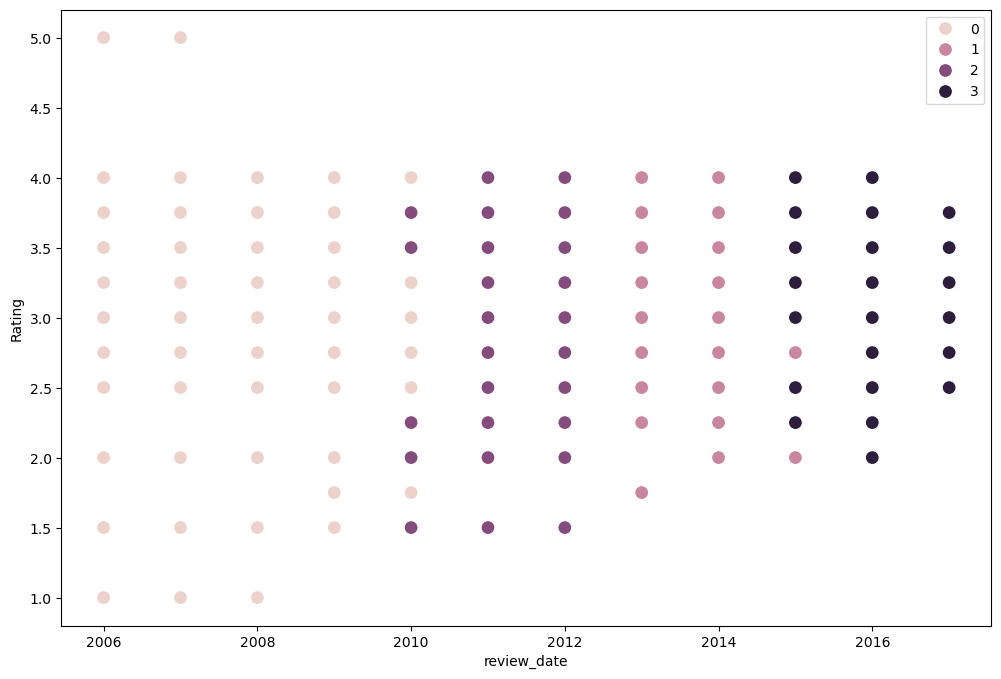

In [91]:
# Plot the clusters for the "Rating and "review_date" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numerical['review_date'], y=df_numerical['Rating'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('review_date') # Label x-axis.
plt.ylabel('Rating') # Label y-axis.
plt.show()

#### This scatterplot shows clusters based on "Rating" and "review_date" variables, with k-means clustering used to segment the data into four groups. Here are the key observations about the clusters:

### Cluster Colors: The four clusters are represented by light pink (0), pink (1), purple (2), and dark purple (3).

### Temporal Distribution: The x-axis represents the review dates from 2006 to 2016, and the y-axis shows the ratings, ranging from 1.0 to 5.0.

### Cluster Characteristics:

Cluster 0 (light pink): Spread across 2010-2012, focusing on moderate to high ratings (2.5-4.0).

Cluster 1 (pink): Similar to cluster 0 but more concentrated in 2016, with high ratings (2.5.0-4.0).

Cluster 2 (purple): Found in earlier reviews (2006-2010), spanning lower ratings to higher rating with few outliers (1.0-5.0).

Cluster 3 (dark purple): Also present in earlier years, this cluster includes reviews with average ratings (2.0-4.0)

The clusters suggest a shift in the distribution of ratings over time, with earlier years having more lower-rated chocolates, while more recent years show higher average ratings, possibly indicating an improvement in the quality of reviewed chocolates.

In [93]:
#Descriptive stats using Groupby()

df_numerical.loc[df_numerical['clusters'] == 3, 'cluster'] = 'dark purple'
df_numerical.loc[df_numerical['clusters'] == 2, 'cluster'] = 'purple'
df_numerical.loc[df_numerical['clusters'] == 1, 'cluster'] = 'pink'
df_numerical.loc[df_numerical['clusters'] == 0, 'cluster'] = 'light pink'

C:\Users\nmsp1\AppData\Local\Temp\ipykernel_9472\1610728628.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerical.loc[df_numerical['clusters'] == 3, 'cluster'] = 'dark purple'


In [94]:
df_numerical.head()

,REF,review_date,cacao_percent,Rating,clusters,cluster
0,1876,2016,63.0,3.75,3,dark purple
1,1676,2015,70.0,2.75,3,dark purple
2,1676,2015,70.0,3.00,3,dark purple
3,1680,2015,70.0,3.50,3,dark purple
4,1704,2015,70.0,3.50,3,dark purple


In [95]:
df_numerical.groupby('cluster').agg({'cacao_percent':['mean', 'median'], 
                         'Rating':['mean', 'median'], 
                         'review_date':['mean', 'median'],
                          'REF':['mean', 'median']})

cacao_percent           Rating         review_date          \
                     mean median      mean median         mean  median   
cluster                                                                  
dark purple     71.814732   70.0  3.243862   3.25  2015.595982  2016.0   
light pink      71.451220   70.0  3.098780   3.00  2007.980488  2008.0   
pink            72.302875   70.0  3.194045   3.25  2013.835729  2014.0   
purple          71.153333   70.0  3.198889   3.25  2011.393333  2011.0   

                     REF          
                    mean  median  
cluster                           
dark purple  1728.526786  1728.0  
light pink    266.997561   267.5  
pink         1276.322382  1279.0  
purple        786.735556   785.0

#### Here are the notes on the descriptive statistics for the clusters based on the variables cacao_percent, Rating, review_date, and REF

 1)Cacao Percent:Dark purple has the highest mean cacao percentage (72.30%), while light pink has the lowest (71.15%).

 2)Rating:Pink has the highest mean rating (3.24), while purple has the lowest (3.09).

 3)Review Date:The median review date follows a similar trend, with the pink cluster skewing toward more recent reviews and purple toward older reviews.

 4)REF:The REF values increase over time, with purple having the lowest mean REF (267) and pink having the highest (1728), reflecting the time of entry into the dataset (older entries having lower REF values).

This aligns with the progression in review_date, as clusters with higher REF values also have more recent reviews.



### Key Observations

1)Cacao Percent: The clusters have similar cacao percentages, with only minor differences between them.

2)Rating: Ratings are fairly consistent across all clusters, but the pink cluster (more recent reviews) tends to have slightly higher ratings.

3)Review Dates and REF: The clusters reflect chronological groupings, with purple representing older reviews (2008) and pink representing the newest reviews (2016). 
REF values also increase accordingly over time.
This analysis indicates that the clustering may be more influenced by time (review date and REF) rather than cacao percentage or rating, which remain relatively consistent across clusters.


### Potential applications of the clustering and descriptive statistics results:

Market Trend Analysis: Identify consumer preferences over time to inform product development and marketing strategies.

Product Development: Guide manufacturers in formulating products based on cluster characteristics, particularly focusing on higher cacao percentages.

Customer Segmentation: Tailor marketing campaigns to different customer segments based on cluster attributes.

Quality Improvement: Target areas for improvement by analyzing clusters with lower ratings.

Forecasting: Predict future ratings and sales for new products using historical data.

These insights can enhance analytics capabilities and drive data-driven decision-making.


# Export data

In [100]:
df_numerical.to_pickle(r'D:\Sonal\career foundry\CareerFoundry\Data Immersion\Achievement 6\Exc 6.5\df_numerical_unsupervised_ML.pkl')

In [101]:
df.to_pickle(r'D:\Sonal\career foundry\CareerFoundry\Data Immersion\Achievement 6\Exc 6.5\New folder\df_unsupervised_ML.pkl')

In [102]:
df.to_excel(r'D:\Sonal\career foundry\CareerFoundry\Data Immersion\Achievement 6\Exc 6.5\New folder\df_new_excel.xlsx', index=False)

In [103]:
df_numerical.to_excel(r'D:\Sonal\career foundry\CareerFoundry\Data Immersion\Achievement 6\Exc 6.5\New folder\df_numerical_excel.xlsx', index=False)